<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vary-EJ,-EL,-find-T2" data-toc-modified-id="Vary-EJ,-EL,-find-T2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vary EJ, EL, find T2</a></span></li><li><span><a href="#Vary-EJ,-EL,-find-T1" data-toc-modified-id="Vary-EJ,-EL,-find-T1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Vary EJ, EL, find T1</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting</a></span></li></ul></div>

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
sys.path.append('/Users/longnguyen/Documents/GitHub/qtrl/')
from qtrl.benchmarking import tomography
from scipy.optimize import minimize
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [56]:
#Device parameters
nlev_lc = 20
nlev_single = 5  # The number of single-qubit levels to show.

In [57]:
N = 30 #number of levels
E_J = 5 #Josephson energy, GHz
E_C = 0.5 #Charging energy, GHz
E_L = 0.5 #Inductive energy, GHz
level_num = 10
phi_ext = np.linspace(0,1,201)
energies = np.zeros((len(phi_ext), level_num))

# Vary EJ, EL, find T2

In [58]:
E_J_array = np.linspace(3,8,11)
energies = np.zeros((len(phi_ext), level_num))
t2_ej = np.zeros((len(phi_ext), len(E_J_array)))
fn_amp = 2.0e-6 #unit is flux quantum

for ej_idx, E_J_temp in enumerate(E_J_array):
    for idx, phi in enumerate(phi_ext):
        H = fluxonium.bare_hamiltonian(N, E_L, E_C, E_J_temp, phi*2*np.pi)
        energies[idx, :] = H.eigenenergies()[:level_num]
    
    trans_energy = energies[:,1]-energies[:,0]
    sensitivity = np.gradient(trans_energy)/(phi_ext[1]-phi_ext[0]) #in unit of GHz / (Flux/phi_o)
    sensitivity = sensitivity*1e9*2*np.pi #Unit of radian Hz / (Flux/phi_o)
    gamma = abs(sensitivity)*fn_amp*np.sqrt(np.log(2))
    t2_ej[:,ej_idx] = (gamma**-1)*1e6

In [59]:
E_L_array = np.linspace(0.2,1.2,11)
energies = np.zeros((len(phi_ext), level_num))
t2_el = np.zeros((len(phi_ext), len(E_L_array)))
fn_amp = 2.0e-6 #unit is flux quantum

for el_idx, E_L_temp in enumerate(E_L_array):
    for idx, phi in enumerate(phi_ext):
        H = fluxonium.bare_hamiltonian(N, E_L_temp, E_C, E_J, phi*2*np.pi)
        energies[idx, :] = H.eigenenergies()[:level_num]
    trans_energy = energies[:,1]-energies[:,0]
    sensitivity = np.gradient(trans_energy)/(phi_ext[1]-phi_ext[0]) #in unit of GHz / (Flux/phi_o)
    sensitivity = sensitivity*1e9*2*np.pi #Unit of radian Hz / (Flux/phi_o)
    gamma = abs(sensitivity)*fn_amp*np.sqrt(np.log(2))
    t2_el[:,el_idx] = (gamma**-1)*1e6

<ipython-input-59-8510970e352e>:14: RuntimeWarning: divide by zero encountered in reciprocal
  t2_el[:,el_idx] = (gamma**-1)*1e6


# Vary EJ, EL, find T1

In [60]:
E_J_array = np.linspace(3,8,11)
energies = np.zeros((len(phi_ext), level_num))
p_me = np.zeros(len(phi_ext))
t1_ej = np.zeros((len(phi_ext), len(E_J_array)))
p_me = np.zeros(len(phi_ext))

h = 6.626e-34
kB = 1.38e-23
T_diel = 20e-3
Q_cap = (1e-6)**-1
# print (Q_cap)


for ej_idx, E_J_temp in enumerate(E_J_array):
    for idx, phi in enumerate(phi_ext):
        H = fluxonium.bare_hamiltonian(N, E_L, E_C, E_J_temp, phi*2*np.pi)
        energies = H.eigenenergies()[:level_num]
        freq = energies[1] - energies[0]
        p_me = fluxonium.phase_matrix_element(N, E_L, E_C, E_J_temp, phi*2*np.pi, 0, 1)
        thermal_factor_diel = (1+np.exp(-h*freq*1e9/(kB*T_diel)))
        gamma_cap = fluxonium.relaxation_rate_cap(E_L, E_C, E_J_temp, Q_cap*(5.0/freq)**0.15, 
                                                                  freq, p_me, T_diel)*thermal_factor_diel
        t1_ej[idx,ej_idx]=1.0/abs(gamma_cap) *1e6

In [61]:
E_L_array = np.linspace(0.2,1.2,11)
energies = np.zeros((len(phi_ext), level_num))
p_me = np.zeros(len(phi_ext))
t1_el = np.zeros((len(phi_ext), len(E_L_array)))
p_me = np.zeros(len(phi_ext))

h = 6.626e-34
kB = 1.38e-23
T_diel = 20e-3
Q_cap = (1e-6)**-1
# print (Q_cap)


for el_idx, E_L_temp in enumerate(E_L_array):
    for idx, phi in enumerate(phi_ext):
        H = fluxonium.bare_hamiltonian(N, E_L_temp, E_C, E_J, phi*2*np.pi)
        energies = H.eigenenergies()[:level_num]
        freq = energies[1] - energies[0]
        p_me = fluxonium.phase_matrix_element(N, E_L_temp, E_C, E_J, phi*2*np.pi, 0, 1)
        thermal_factor_diel = (1+np.exp(-h*freq*1e9/(kB*T_diel)))
        gamma_cap = fluxonium.relaxation_rate_cap(E_L_temp, E_C, E_J, Q_cap*(5.0/freq)**0.15, 
                                                                  freq, p_me, T_diel)*thermal_factor_diel
        t1_el[idx,el_idx]=1.0/abs(gamma_cap) *1e6

# Plotting

Text(0.5, 0, '$\\varphi_\\mathrm{ext}/2\\pi$')

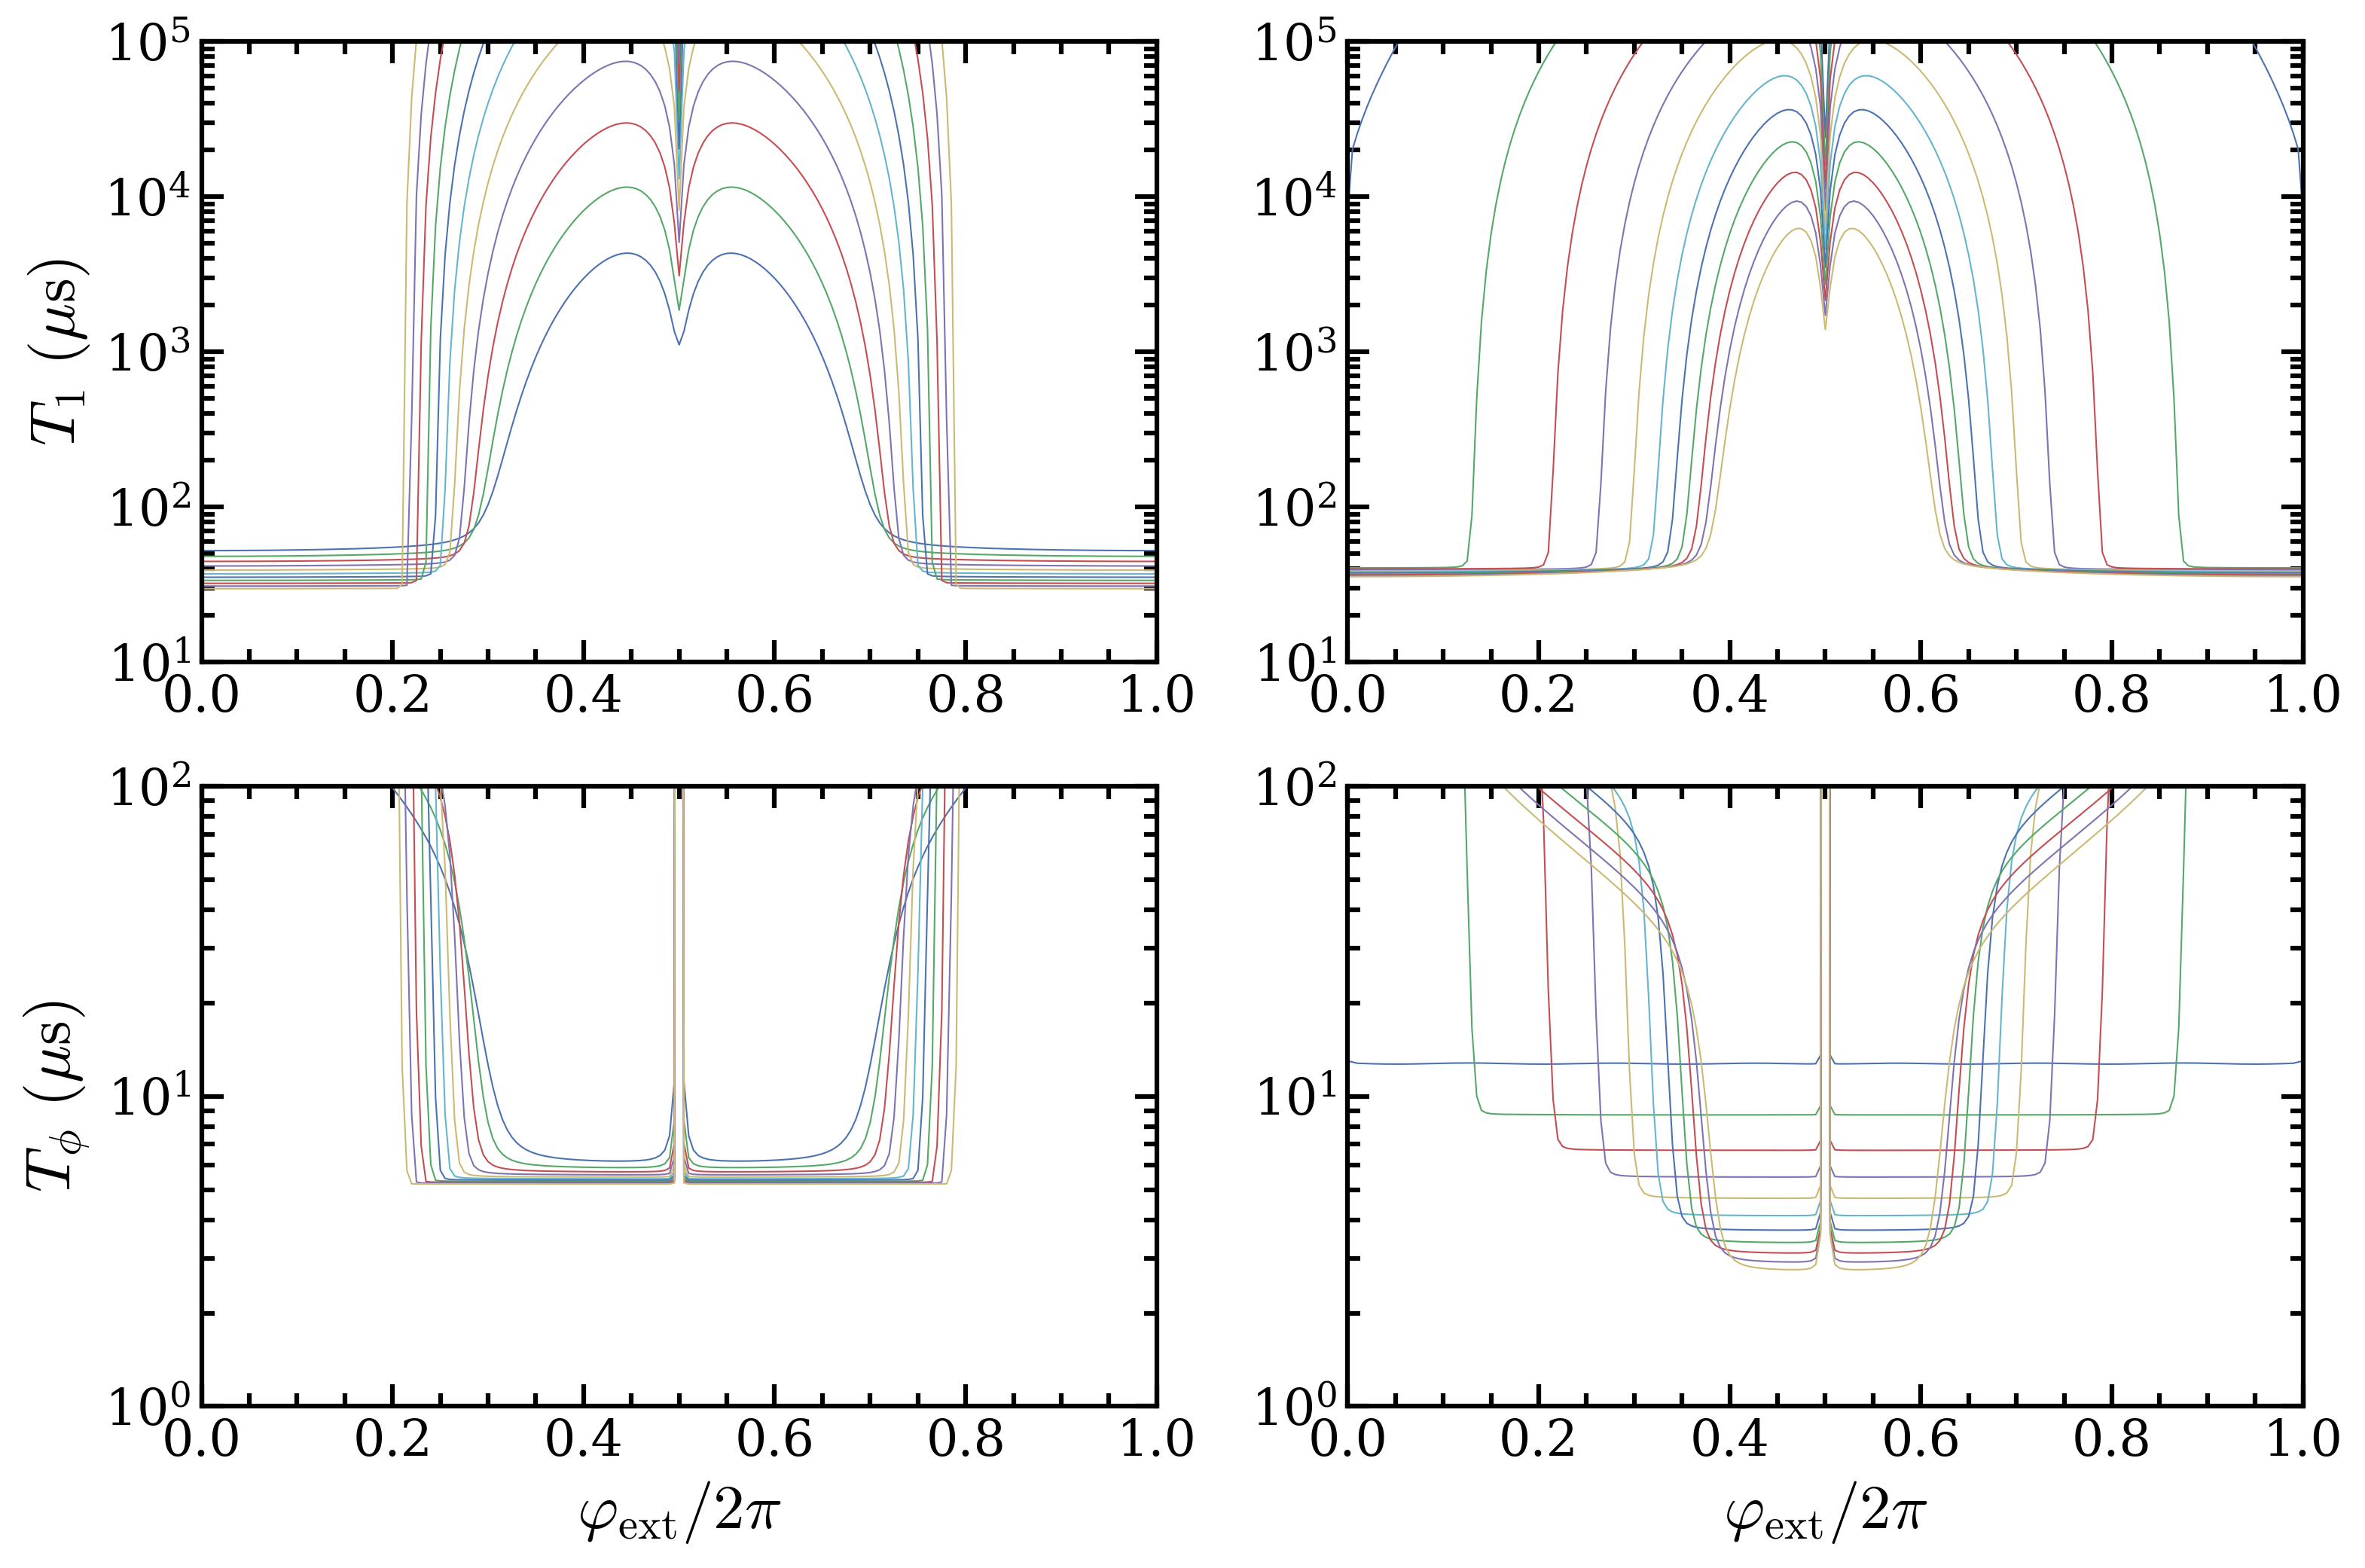

In [62]:
fig, axes = plt.subplots(2,2, sharex = False, sharey = False,figsize = [12,8])
for idx in range(11):
    axes[1,0].plot(phi_ext, t2_ej[:,idx],linewidth = 0.5)
for idx in range(11):
    axes[1,1].plot(phi_ext, t2_el[:,idx],linewidth = 0.5)
for idx in range(11):
    axes[0,0].plot(phi_ext, t1_ej[:,idx],linewidth = 0.5)
for idx in range(11):
    axes[0,1].plot(phi_ext, t1_el[:,idx],linewidth = 0.5)
    

axes[0,0].set_yscale('log') 
axes[0,0].set_ylim([1e1,1e5])
axes[0,0].set_xlim([0,1])
axes[0,1].set_yscale('log') 
axes[0,1].set_ylim([1e1,1e5])
axes[0,1].set_xlim([0,1])
axes[0,0].set_ylabel(r'$T_1~\mathrm{(\mu s})}$')

axes[1,0].set_yscale('log')
axes[1,0].set_ylim([1,1e2])
axes[1,0].set_xlim([0,1])
axes[1,1].set_yscale('log')
axes[1,1].set_ylim([1,1e2])
axes[1,0].set_ylabel(r'$T_\phi~\mathrm{(\mu s})}$')
axes[1,0].set_xlim([0,1])
axes[1,1].set_xlim([0,1])
axes[1,0].set_yticks([1,10,100])
axes[1,1].set_xlim([0,1])
axes[1,0].set_xlabel(r'$\varphi_\mathrm{ext}/2\pi$')
axes[1,1].set_xlabel(r'$\varphi_\mathrm{ext}/2\pi$')
